# CNN Multiclass Image Classification

### Steps
1. Become one with data
2. Preprocess the data
3. Create a model start with the base line
4. Fit the model (overfit it to make sure it learns )
5. Evaluate the model
6. Adjust different hyperparameters and improve the model to reduce the overfiting and to beat the base model
7. Repeat until satisfied

## Get the data

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


# Unzip our data
zipref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')

zipref.extractall()

zipref.close()

--2024-04-20 10:13:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 2607:f8b0:4023:c03::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  32.9MB/s    in 6.0s    

2024-04-20 10:13:34 (82.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath} ")

There are 2 directories and 0 images in '10_food_classes_all_data 
There are 10 directories and 0 images in '10_food_classes_all_data/train 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen 
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon 
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream 
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza 
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice 
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings 
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak 
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger 
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry 
There are 1

In [5]:
# setup the test and train directories
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [7]:
# Visualize Visualize and Visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # reading the image and plotting in matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])

  # plot the image
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

Image shape: (384, 512, 3)


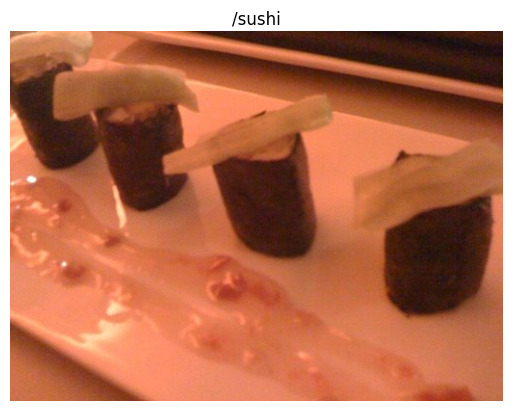

In [8]:
img = view_random_image(target_dir = train_dir, target_class = "/"+random.choice(class_names))

## Preprocess the data

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Rescale the images
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1./255)

# load data in from directories and trun it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Model1: Create a CNN Multiclass classification model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [17]:
# random seed
tf.random.set_seed(42)

# Create a mopdel

model_1 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu",
           input_shape = (224, 224, 3)),

    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),

    MaxPool2D(),

    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),

    Conv2D(filters = 10,
           kernel_size = 3,
           activation = "relu"),

    MaxPool2D(),

    Flatten(),

    Dense(10, activation = "softmax")
])

# Compile the model
model_1.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ["accuracy"]
)

# Fit
history_2 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 37s 136ms/step - loss: 2.1335 - accuracy: 0.2307 - val_loss: 1.9997 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 30s 125ms/step - loss: 1.9445 - accuracy: 0.3215 - val_loss: 1.9020 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 33s 141ms/step - loss: 1.7532 - accuracy: 0.4007 - val_loss: 1.9517 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.3965 - accuracy: 0.5372 - val_loss: 1.9656 - val_accuracy: 0.3320
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.8826 - accuracy: 0.7109 - val_loss: 2.3900 - val_accuracy: 0.3072


<Axes: >

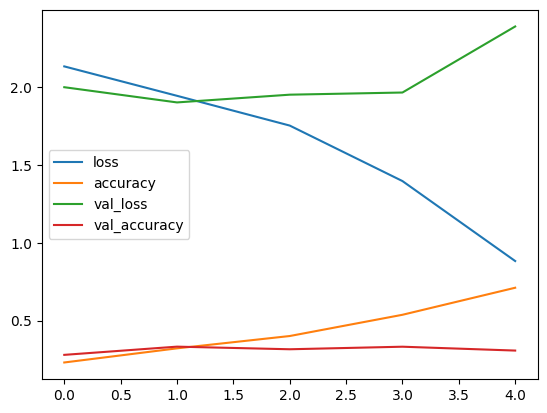

In [19]:
import pandas as pd

pd.DataFrame(history_2.history).plot()

In [20]:
# Evaluate on test data
model_1.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 2.3900 - accuracy: 0.3072


[2.390014410018921, 0.30720001459121704]

## Plot Loss Curve

In [24]:
# plot the validation and training curve separately

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")

  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy loss")
  plt.plot(epochs, val_accuracy, label = "val_acc")

  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

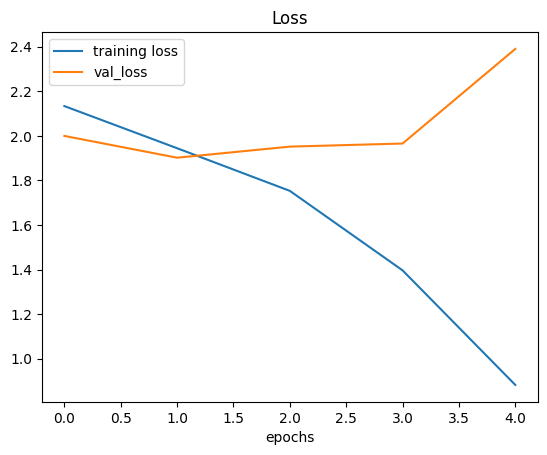

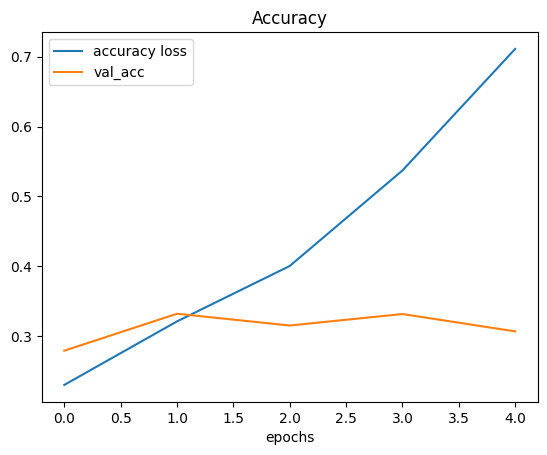

In [25]:
plot_loss_curves(history_2)

# Data Augmentation

In [27]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# test_datagen_augmented = ImageDataGenerator(
#     rescale = 1./255,
#     rotate = 0.2,
#     width_shift_range = 0.2,
#     height_shift_range = 0.2,
#     horizontal_flip = True
# )

In [29]:
train_data_augmented = train_datagen_augmented.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "categorical"
)

# test_data_augmented = test_datagen_augmented.flow_from_directory(
#     directory = test_dir,
#     image_size = (224, 224),
#     batch_size = 32,
#     class_mode = "categorical"
# )

Found 7500 images belonging to 10 classes.


# Model2 : Augmented data train

In [30]:
# create a model  ( clone only clones the model architecture )
model_2 = tf.keras.models.clone_model(model_1)

# Compile the model
model_2.compile(
    loss = CategoricalCrossentropy(),
    optimizer = Adam(),
    metrics = ['accuracy']
)

# Fit the augmented data
history = model_2.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
235/235 [==============================] - 108s 454ms/step - loss: 2.2247 - accuracy: 0.1600 - val_loss: 2.0959 - val_accuracy: 0.2340
Epoch 2/5
235/235 [==============================] - 105s 445ms/step - loss: 2.1411 - accuracy: 0.2137 - val_loss: 2.0587 - val_accuracy: 0.2320
Epoch 3/5
235/235 [==============================] - 107s 454ms/step - loss: 2.1172 - accuracy: 0.2252 - val_loss: 2.0262 - val_accuracy: 0.2640
Epoch 4/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0649 - accuracy: 0.2669 - val_loss: 1.9650 - val_accuracy: 0.3108
Epoch 5/5
235/235 [==============================] - 106s 452ms/step - loss: 2.0094 - accuracy: 0.2929 - val_loss: 1.9401 - val_accuracy: 0.3276


In [31]:
# Evaluate
model_2.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.9401 - accuracy: 0.3276


[1.9400687217712402, 0.32760000228881836]

<Axes: >

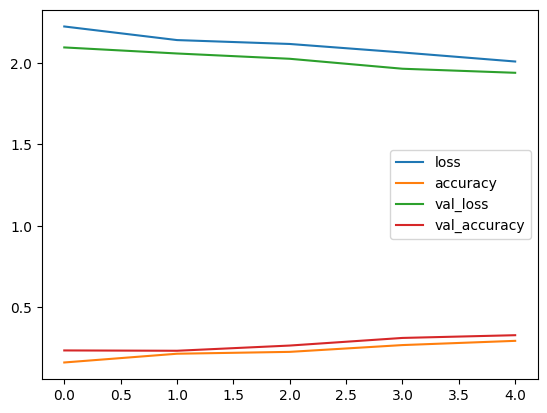

In [32]:
pd.DataFrame(history.history).plot()

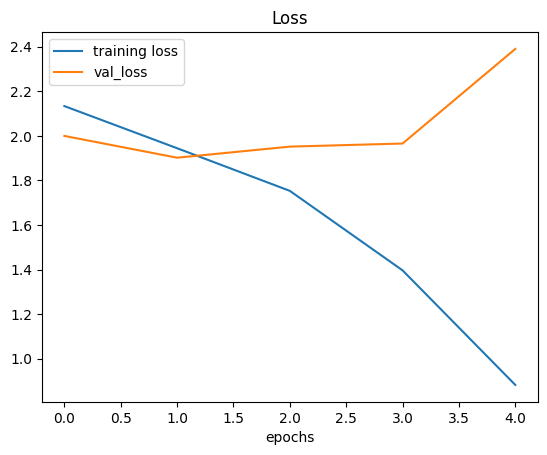

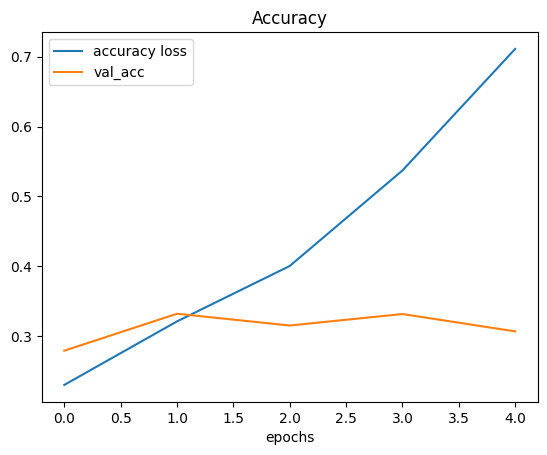

In [33]:
plot_loss_curves(history_2)

# Making Predictions on our custom images

In [34]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [44]:
# Download some custom images
import matplotlib.image as mpimg

img = mpimg.imread("/content/10_food_classes_all_data/test/chicken_curry/101833.jpg")
img.shape

(384, 512, 3)

In [45]:
# Preprocess
def pre_process(image, image_shape = 224):
  # read the image
  img = tf.io.read_file(image)

  # decode the read file into a tensor
  img = tf.image.decode_image(img)

  # resize the image
  img = tf.image.resize(img, size = [image_shape, image_shape])

  # rescale the image
  img = img / 255.

  return img

In [46]:
image = pre_process("/content/10_food_classes_all_data/test/chicken_curry/101833.jpg")

In [48]:
model_2.predict(tf.expand_dims(image, axis = 0))

1/1 [==============================] - 0s 315ms/step


array([[0.0265067 , 0.03699129, 0.04670607, 0.2815674 , 0.07027777,
        0.01402931, 0.04981314, 0.04927779, 0.39113945, 0.03369109]],
      dtype=float32)

In [62]:
def pred_and_plot(model, filename, class_names = class_names):

  # img = mpimg.imread(filename)

  img = pre_process(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[tf.argmax(pred, axis = 1)]

  print(tf.argmax(pred))
  print(pred)

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")

1/1 [==============================] - 0s 17ms/step
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)
[[0.0265067  0.03699129 0.04670607 0.2815674  0.07027777 0.01402931
  0.04981314 0.04927779 0.39113945 0.03369109]]


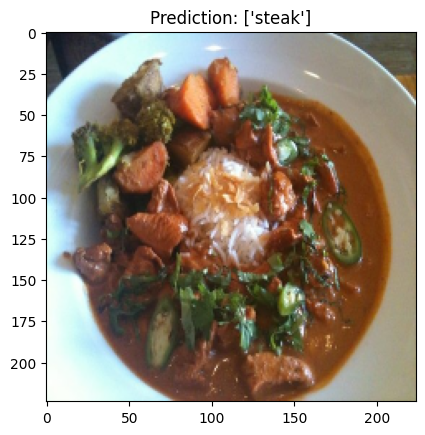

In [64]:
pred_and_plot(model_2,"/content/10_food_classes_all_data/test/chicken_curry/101833.jpg")

# Saving and loading the model

In [65]:
model_2.save("saved_trained_model2")

In [66]:
# load model
loaded_model_2 = tf.keras.models.load_model("saved_trained_model2")
loaded_model_2.evaluate(test_data)

79/79 [==============================] - 7s 92ms/step - loss: 1.9401 - accuracy: 0.3276


[1.9400691986083984, 0.32760000228881836]